# Risk Prediction


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display options
pd.set_option('display.max_columns', 40)
sns.set_theme(style="whitegrid", palette="deep")

# Load the data
DATA_PATH = "/content/stroke_ds.csv"
df = pd.read_csv(DATA_PATH)

target = "stroke"
print(f"Shape  : {df.shape}")
df.head()


Shape  : (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Check for missing values and print as counts
na_counts = df.isna().sum().sort_values(ascending=False)

print("Columns with Missing Values:\n")
for col, count in na_counts.items():
    print(f"{col}: {count} missing values")


Columns with Missing Values:

bmi: 201 missing values
id: 0 missing values
age: 0 missing values
gender: 0 missing values
hypertension: 0 missing values
heart_disease: 0 missing values
work_type: 0 missing values
ever_married: 0 missing values
Residence_type: 0 missing values
avg_glucose_level: 0 missing values
smoking_status: 0 missing values
stroke: 0 missing values


In [ ]:
#Descriptive statistics of numeric features
num_desc = df.describe().T
display(num_desc.style.background_gradient(cmap="Blues"))

,count,mean,std,min,25%,50%,75%,max
id,5110.000000,36517.829354,21161.721625,67.000000,17741.250000,36932.000000,54682.000000,72940.000000
age,5110.000000,43.226614,22.612647,0.080000,25.000000,45.000000,61.000000,82.000000
hypertension,5110.000000,0.097456,0.296607,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,5110.000000,0.054012,0.226063,0.000000,0.000000,0.000000,0.000000,1.000000
avg_glucose_level,5110.000000,106.147677,45.283560,55.120000,77.245000,91.885000,114.090000,271.740000
bmi,4909.000000,28.893237,7.854067,10.300000,23.500000,28.100000,33.100000,97.600000
stroke,5110.000000,0.048728,0.215320,0.000000,0.000000,0.000000,0.000000,1.000000


Text(0.5, 1.0, 'Boxplot (Outlier Check)')

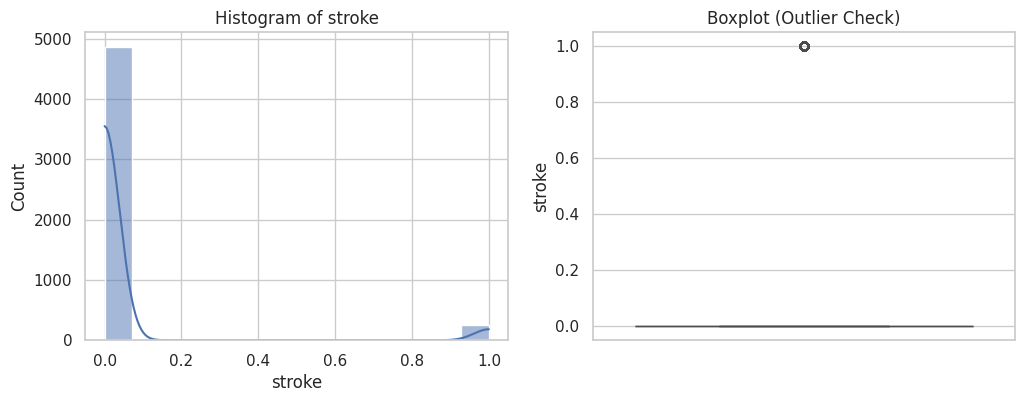

In [ ]:
#Distribution & outliers of stroke
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.histplot(df[target].dropna(), kde=True, ax=ax[0])
ax[0].set_title("Histogram of stroke")

sns.boxplot(y=df[target], ax=ax[1])
ax[1].set_title("Boxplot (Outlier Check)")


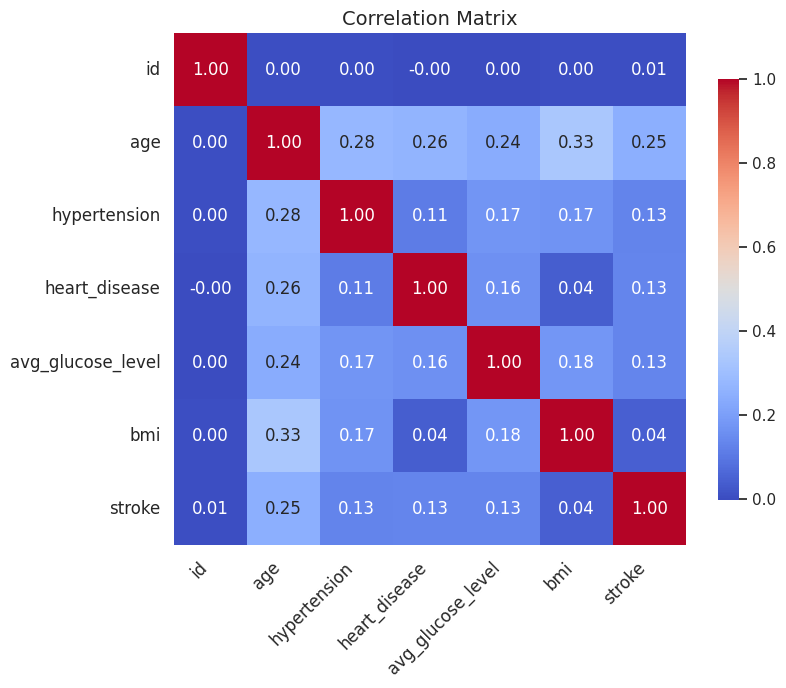

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = "/content/stroke_ds.csv"
df = pd.read_csv(DATA_PATH)

# correlations for numeric columns only
corr = df.select_dtypes(include=[np.number]).corr()

# Dynamic sizing & font scaling so numbers stay legible
n = len(corr)                            # number of variables
fig_w = 1.2 * n                          # width in inches
fig_h = 1.0 * n                          # height in inches
font_sz = max(6, min(12, 300 / n))       # clamp between 6–12 pt

# Draw heat-map
sns.set_theme(style="white")             # turn off the usual whitegrid
plt.figure(figsize=(fig_w, fig_h))
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=True, fmt=".2f",
    annot_kws={"size": font_sz},
    square=True,
    linewidths=0,
    cbar_kws={"shrink": 0.8},
)

plt.xticks(rotation=45, ha="right", fontsize=font_sz)
plt.yticks(rotation=0, fontsize=font_sz)
plt.title("Correlation Matrix", fontsize=font_sz + 2)
plt.tight_layout()
plt.show()


Text(0.5, 0, 'Pearson r')

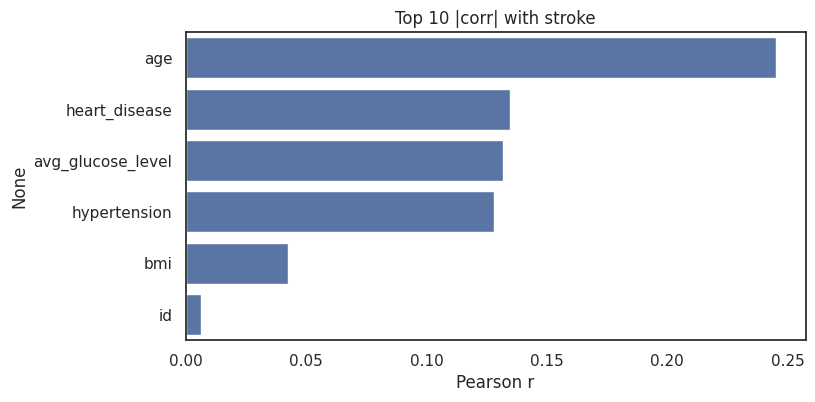

In [ ]:
top_corr = corr[target].drop(target).sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top 10 |corr| with stroke"); plt.xlabel("Pearson r")

Text(0.5, 0, 'Pearson r')

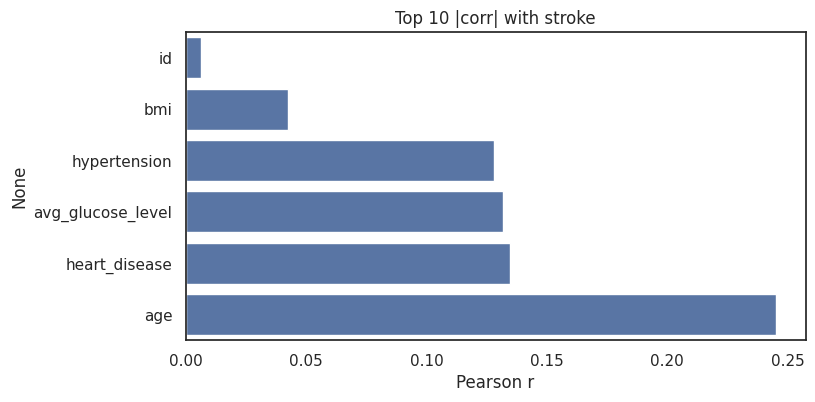

In [ ]:
top_corr = corr[target].drop(target).sort_values(ascending=True).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top 10 |corr| with stroke"); plt.xlabel("Pearson r")


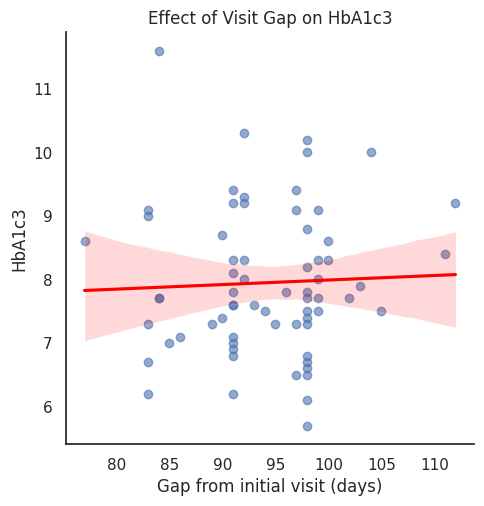

In [ ]:
sns.lmplot(data=df, x="Gap from initial visit (days)", y=target,
           scatter_kws=dict(alpha=.6), line_kws=dict(color='red'))
plt.title("Effect of Visit Gap on stroke");


28 numeric cols  ➜ ['AGE', 'DURATION DM', 'DDS1', 'FVG1', 'HbA1c1', 'Gap from initial visit (days)', 'FVG2', 'HbA1c2', 'Reduction A', 'Gap from first clinical visit (days)'] …
7 categorical cols ➜ ['GENDER', 'INSULIN REGIMEN', 'Date1', 'Date2', 'CKD Stage', 'Group', 'eGFR_stage_label'] …

▶ AGE


,count,mean,std,min,25%,50%,75%,max
AGE,67.0,42.656716,9.700909,21.0,36.5,42.0,48.0,66.0


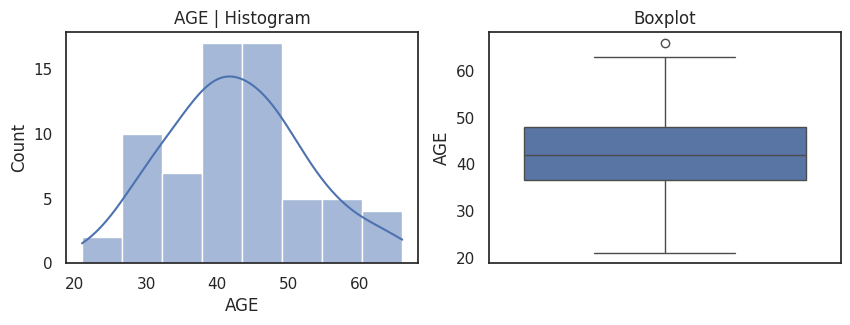


▶ DURATION DM


,count,mean,std,min,25%,50%,75%,max
DURATION DM,67.0,11.58209,5.627716,2.0,6.5,11.0,15.5,26.0


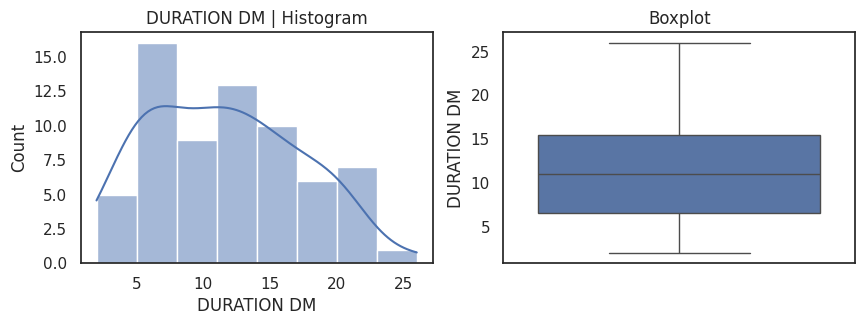


▶ DDS1


,count,mean,std,min,25%,50%,75%,max
DDS1,67.0,2.687761,0.932551,1.06,2.06,2.59,3.18,5.29


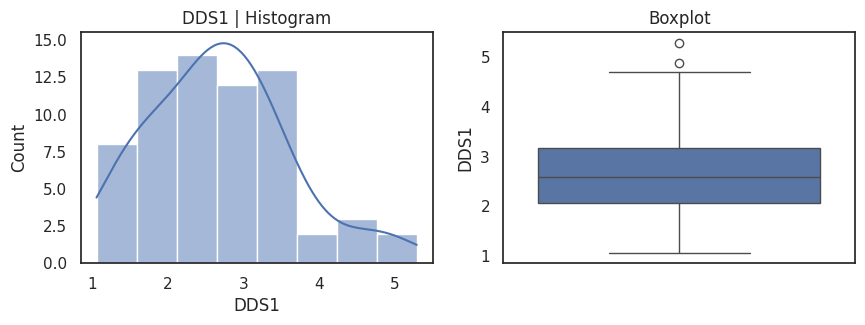


▶ FVG1


,count,mean,std,min,25%,50%,75%,max
FVG1,67.0,10.838806,4.252377,3.6,7.9,10.1,13.9,21.5


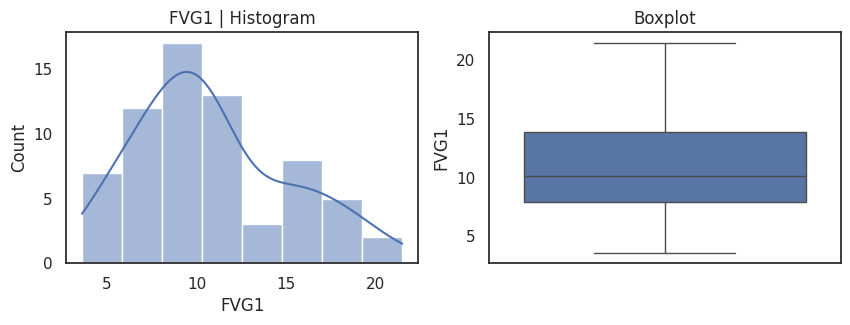


▶ HbA1c1


,count,mean,std,min,25%,50%,75%,max
HbA1c1,67.0,9.7,1.393383,8.0,8.65,9.4,10.55,14.0


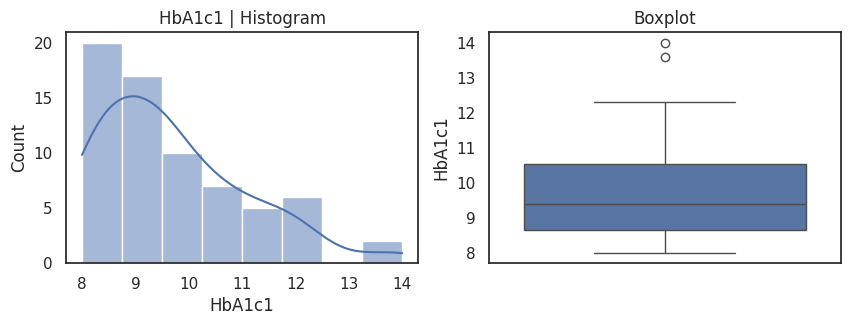


▶ Gap from initial visit (days)


,count,mean,std,min,25%,50%,75%,max
Gap from initial visit (days),67.0,94.089552,6.721137,77.0,91.0,95.0,98.0,112.0


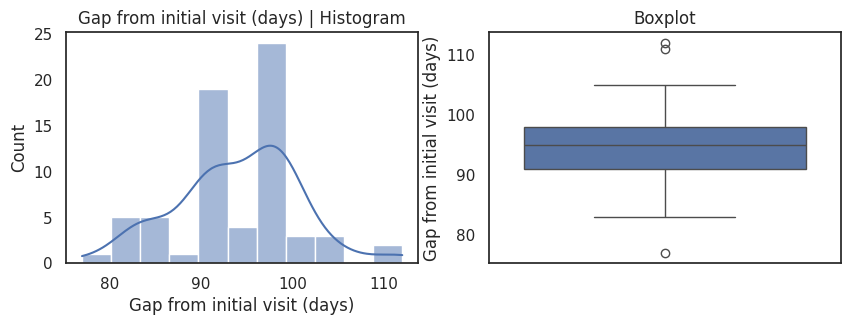


▶ FVG2


,count,mean,std,min,25%,50%,75%,max
FVG2,67.0,7.89403,2.602439,3.0,5.95,7.6,9.75,16.0


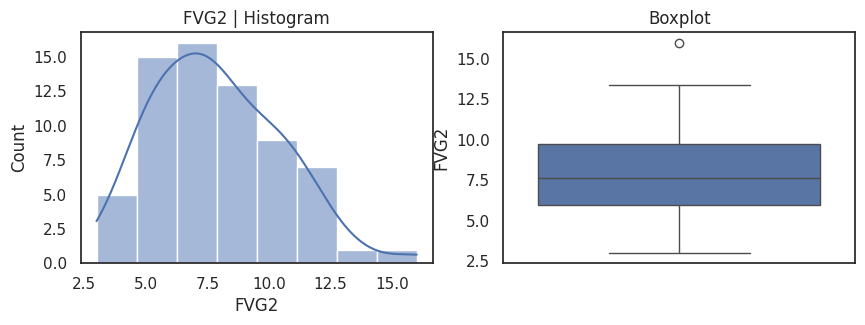


▶ HbA1c2


,count,mean,std,min,25%,50%,75%,max
HbA1c2,67.0,8.070149,1.141638,5.6,7.15,8.2,8.8,11.2


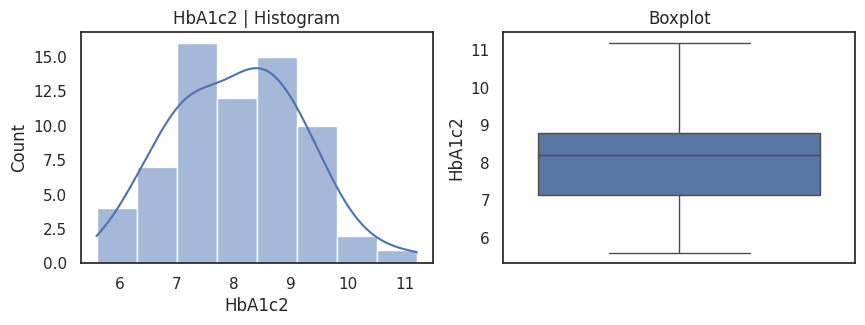


▶ Reduction A


,count,mean,std,min,25%,50%,75%,max
Reduction A,67.0,21.946269,22.103039,-10.8,8.85,16.7,29.45,112.1


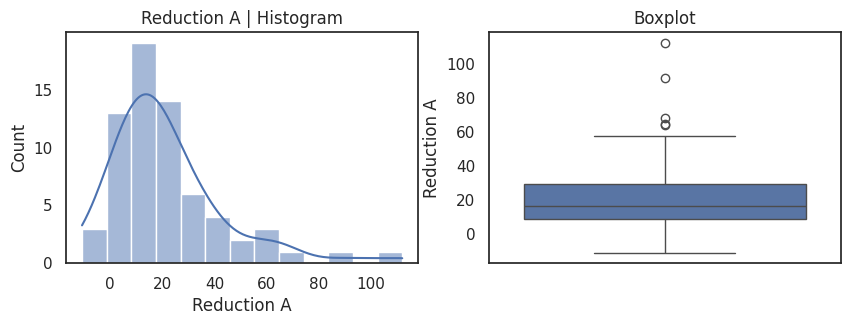


▶ Gap from first clinical visit (days)


,count,mean,std,min,25%,50%,75%,max
Gap from first clinical visit (days),67.0,86.731343,9.069733,70.0,83.0,84.0,91.0,113.0


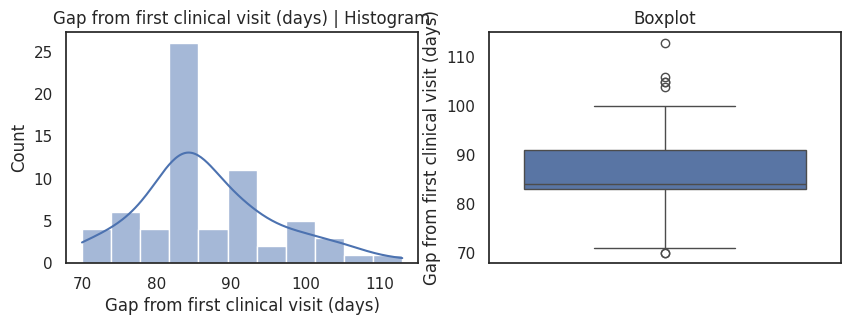


▶ DDS3


,count,mean,std,min,25%,50%,75%,max
DDS3,67.0,2.315522,0.944692,1.0,1.53,2.24,2.82,5.59


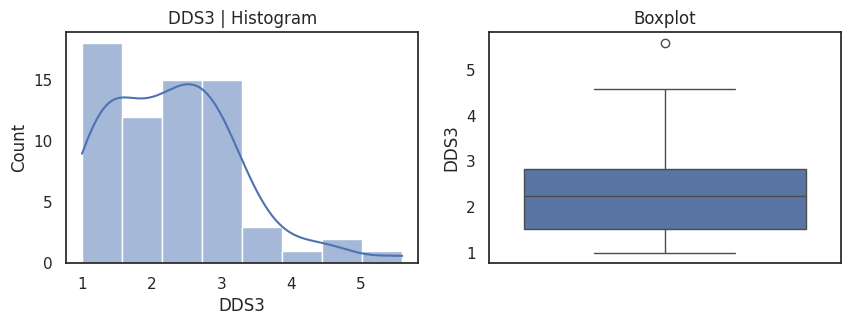


▶ FVG3


,count,mean,std,min,25%,50%,75%,max
FVG3,67.0,8.38209,3.020933,3.6,6.1,7.6,10.05,15.8


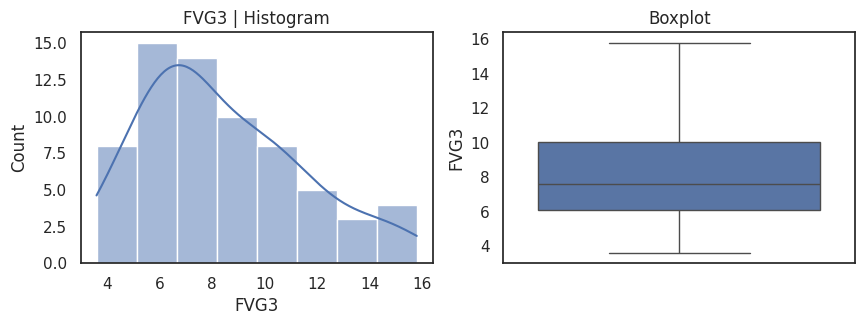


▶ HbA1c3


,count,mean,std,min,25%,50%,75%,max
HbA1c3,67.0,7.947761,1.141816,5.7,7.3,7.7,8.65,11.6


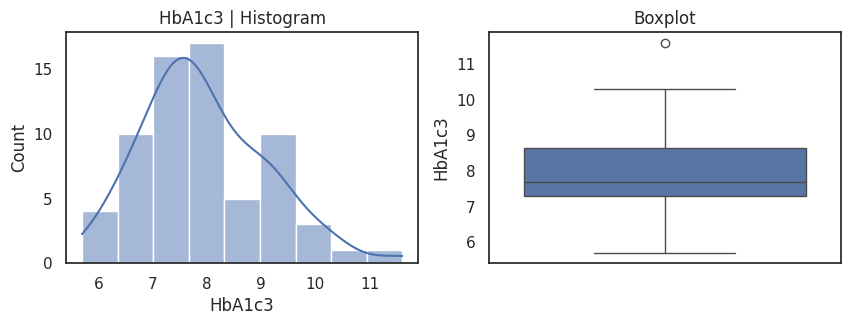


▶ Freq Hypo


,count,mean,std,min,25%,50%,75%,max
Freq Hypo,67.0,2.955224,5.541668,0.0,0.0,0.0,3.0,33.0


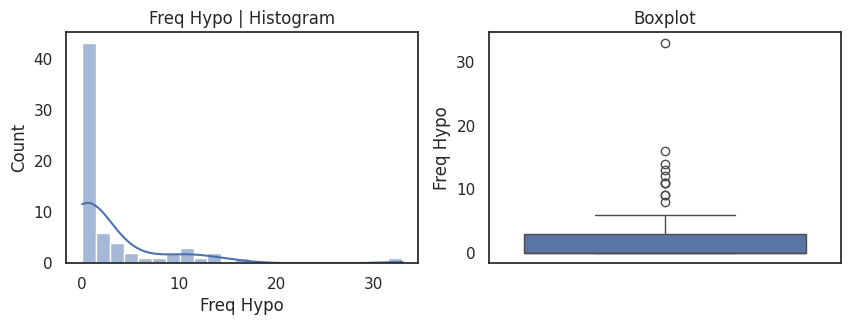


▶ Freq of Visits


,count,mean,std,min,25%,50%,75%,max
Freq of Visits,67.0,3.910448,1.055022,3.0,3.0,3.0,5.0,7.0


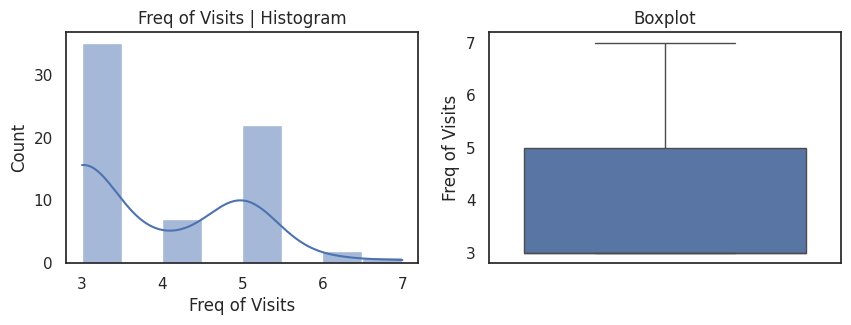


▶ Reduction (%)


,count,mean,std,min,25%,50%,75%,max
Reduction (%),67.0,16.976119,13.573672,-16.3,6.95,18.7,26.35,51.4


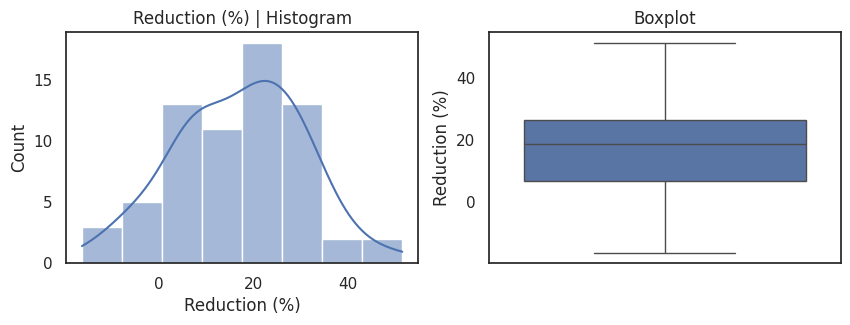


▶ eGFR


,count,mean,std,min,25%,50%,75%,max
eGFR,67.0,95.639552,28.391356,38.49,77.1,91.38,115.1,157.3


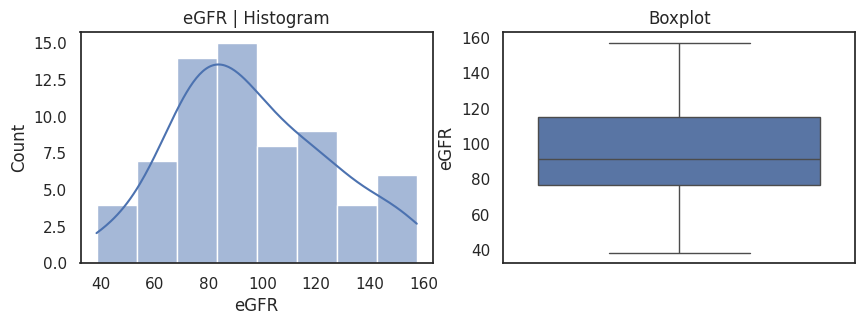


▶ HbA1c_Delta_1_2


,count,mean,std,min,25%,50%,75%,max
HbA1c_Delta_1_2,67.0,-1.629851,1.516676,-7.4,-2.15,-1.3,-0.75,1.0


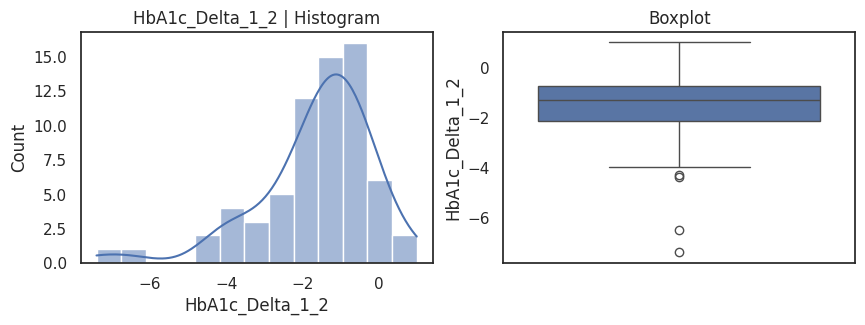


▶ FVG_Delta_1_2


,count,mean,std,min,25%,50%,75%,max
FVG_Delta_1_2,67.0,-2.944776,4.697236,-14.9,-5.95,-2.1,0.4,6.3


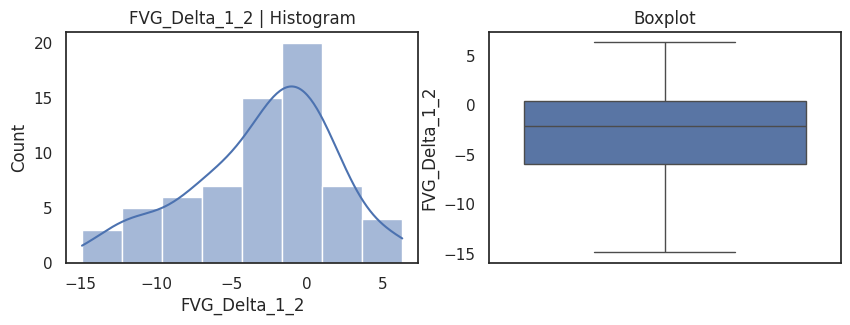


▶ DDS_Trend_1_3


,count,mean,std,min,25%,50%,75%,max
DDS_Trend_1_3,67.0,-0.372239,0.768037,-3.47,-0.67,-0.35,0.135,1.18


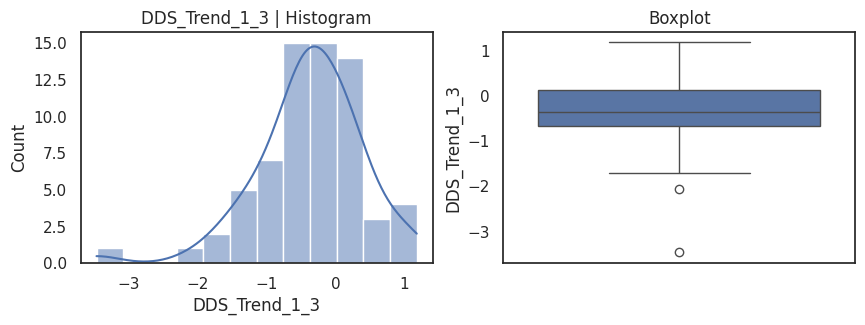


▶ Avg_FVG_1_2


,count,mean,std,min,25%,50%,75%,max
Avg_FVG_1_2,67.0,9.366418,2.62901,4.0,7.65,9.0,11.25,14.95


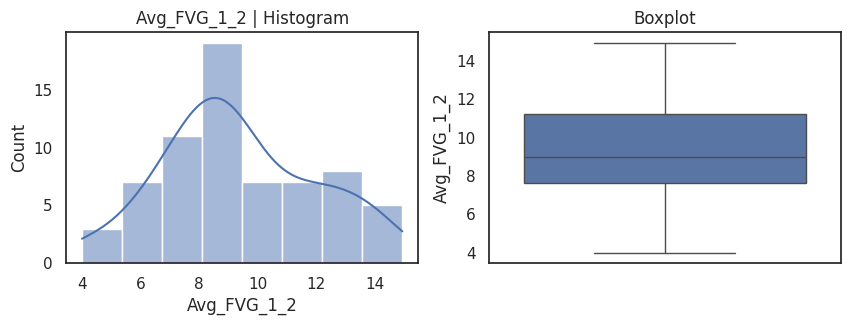


▶ HbA1c_per_day_change


,count,mean,std,min,25%,50%,75%,max
HbA1c_per_day_change,67.0,-0.017453,0.016234,-0.081319,-0.02325,-0.013953,-0.007589,0.012048


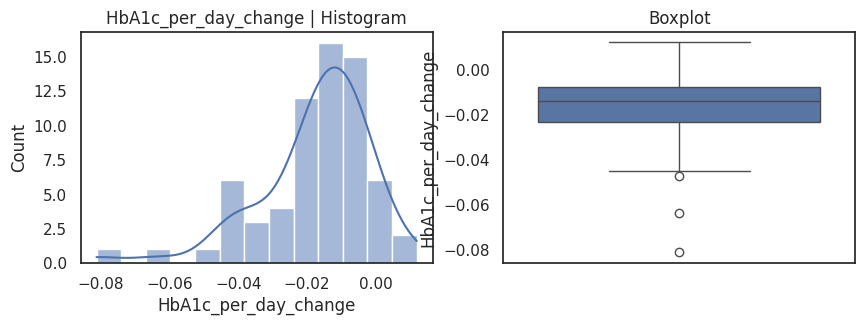


▶ eGFR_stage_code


,count,mean,std,min,25%,50%,75%,max
eGFR_stage_code,67.0,1.58209,0.741605,1.0,1.0,1.0,2.0,4.0


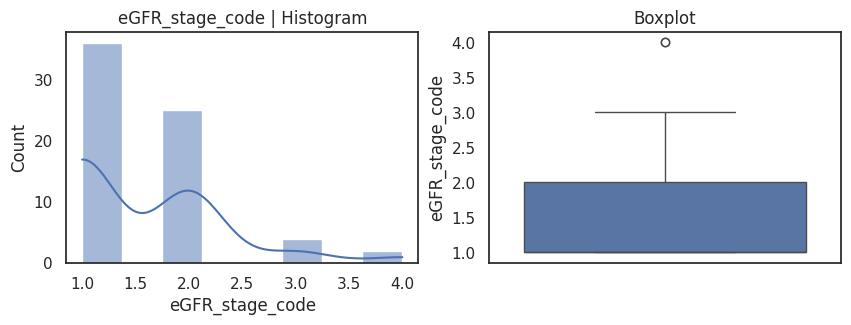


▶ Visit_Interval_Ratio


,count,mean,std,min,25%,50%,75%,max
Visit_Interval_Ratio,67.0,0.479101,0.038493,0.384615,0.457304,0.480874,0.502635,0.576531


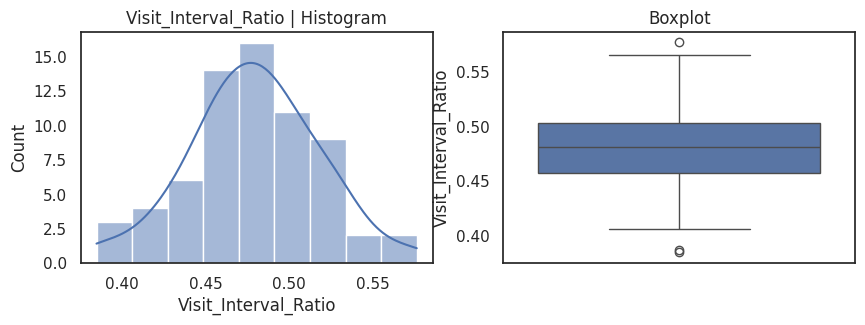


▶ ReductionA_per_day


,count,mean,std,min,25%,50%,75%,max
ReductionA_per_day,67.0,0.252061,0.258778,-0.128571,0.104252,0.186,0.348578,1.318824


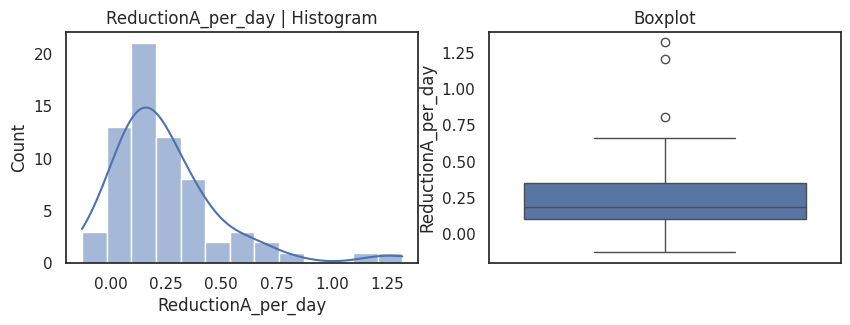


▶ Hypo_per_visit


,count,mean,std,min,25%,50%,75%,max
Hypo_per_visit,67.0,0.861194,1.738225,0.0,0.0,0.0,0.666667,11.0


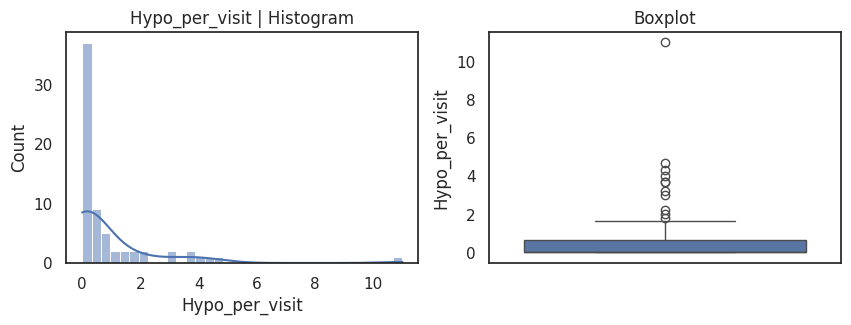


▶ Insulin_Regimen_Type


,count,mean,std,min,25%,50%,75%,max
Insulin_Regimen_Type,67.0,0.641791,0.829412,0.0,0.0,0.0,1.0,2.0


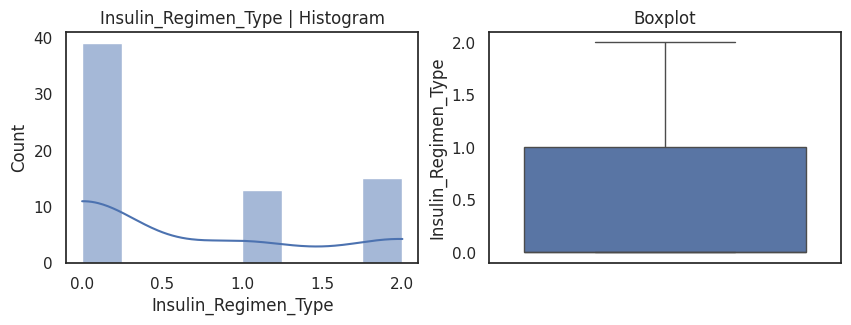


▶ HbA1c_change_rate_v1_v2


,count,mean,std,min,25%,50%,75%,max
HbA1c_change_rate_v1_v2,67.0,-0.017453,0.016234,-0.081319,-0.02325,-0.013953,-0.007589,0.012048


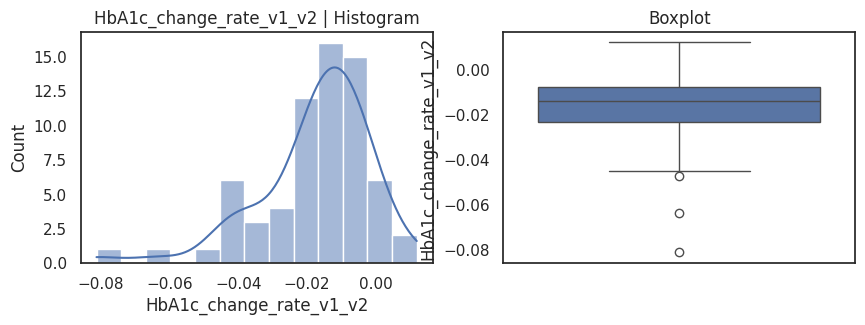

In [ ]:
def numeric_univariate(col):
    print(f"\n▶ {col}")
    display(df[col].describe().to_frame().T)      # stats table

    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    sns.histplot(df[col].dropna(), kde=True, ax=ax[0])
    ax[0].set_title(f"{col} | Histogram")
    sns.boxplot(y=df[col], ax=ax[1])
    ax[1].set_title("Boxplot")
    plt.show()

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"{len(num_cols)} numeric cols  ➜", num_cols[:10], "…")
print(f"{len(cat_cols)} categorical cols ➜", cat_cols[:10], "…")

# Run for ALL numeric columns
for c in num_cols:
    numeric_univariate(c)


In [ ]:
# Install and import dependencies
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LassoCV, RidgeCV

#  Load the uploaded CSV
df = pd.read_csv("stroke_ds.csv", encoding='ISO-8859-1')

#  Data Cleaning
df = df.dropna()

#  Define predictors (X) and target (y)
y = df['stroke']
X = df.drop(columns=[
    'stroke', 'Group', 'DDS3', 'FVG3', 'Reduction (%)',
    'INSULIN REGIMEN', 'Date1', 'Date2', 'GENDER', 'CKD Stage', 'eGFR_stage_label'
])

#  Feature Scoring
uni = SelectKBest(score_func=f_regression, k='all')
uni.fit(X, y)
uni_scores = pd.Series(uni.scores_, index=X.columns)

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)
rf_imp = pd.Series(rf.feature_importances_, index=X.columns)

lasso = LassoCV(cv=5, random_state=42).fit(X, y)
lasso_coef = pd.Series(lasso.coef_, index=X.columns)

gbm = GradientBoostingRegressor(n_estimators=200, random_state=42)
gbm.fit(X, y)
gbm_imp = pd.Series(gbm.feature_importances_, index=X.columns)

et = ExtraTreesRegressor(n_estimators=200, random_state=42)
et.fit(X, y)
et_imp = pd.Series(et.feature_importances_, index=X.columns)

ridge = RidgeCV(cv=5).fit(X, y)
ridge_coef = pd.Series(ridge.coef_, index=X.columns)

mi = pd.Series(mutual_info_regression(X, y, random_state=42), index=X.columns)

# Combine results
feature_df = pd.DataFrame({
    'F-test': uni_scores,
    'Random Forest': rf_imp,
    'Gradient Boosting': gbm_imp,
    'Extra Trees': et_imp,
    'Lasso': lasso_coef,
    'Ridge': ridge_coef,
    'Mutual Info': mi
}).dropna()

#  Display top N features from each method
top_n = 10
print("\n=== Top Features by Method ===\n")

for method in feature_df.columns:
    print(f"\n▶ {method} (Top {top_n})")
    print(feature_df[method].abs().sort_values(ascending=False).head(top_n).to_string())

#  Evaluate Random Forest using its top 5 features
top5_rf = rf_imp.nlargest(5).index.tolist()
rf_score = cross_val_score(rf, X[top5_rf], y, cv=5, scoring='r2').mean()
print(f"\n Random Forest R² using top 5 features: {rf_score:.3f}")



=== Top Features by Method ===


▶ F-test (Top 10)
HbA1c2                     70.871209
Avg_FVG_1_2                13.867547
FVG2                       12.962489
Reduction A                11.290136
ReductionA_per_day         10.392105
HbA1c_Delta_1_2             7.325617
HbA1c_change_rate_v1_v2     6.935947
HbA1c_per_day_change        6.935947
Hypo_per_visit              5.640761
Freq Hypo                   5.288913

▶ Random Forest (Top 10)
HbA1c2                  0.489020
FVG1                    0.058867
Avg_FVG_1_2             0.044309
FVG_Delta_1_2           0.040344
eGFR                    0.034400
AGE                     0.030477
FVG2                    0.029821
DDS_Trend_1_3           0.027128
Reduction A             0.024572
Visit_Interval_Ratio    0.023900

▶ Gradient Boosting (Top 10)
HbA1c2                                  0.501830
FVG1                                    0.111597
eGFR                                    0.057865
Avg_FVG_1_2                             0.046

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Load dataset
df = pd.read_csv("stroke_ds.csv", encoding='ISO-8859-1')
df = df.dropna()

# 2. Define target and final selected features
target = 'stroke'
top_features = [
    'HbA1c1','HbA1c2','Avg_FVG_1_2','FVG1','FVG2','FVG_Delta_1_2',
    'Reduction A'
]

# 3. Prepare training data
X = df[top_features]
y = df[target]

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Train a Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 7. Output results
print(" Model Trained with Top Features")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")

# 8. Optional: Cross-validation score for robustness
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
print(f"Cross-Validated R²: {cv_r2:.3f}")


 Model Trained with Top Features
R² Score: 0.608
Mean Absolute Error (MAE): 0.567
Cross-Validated R²: 0.207


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
)
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Load and prepare data
df = pd.read_csv("stroke_ds.csv", encoding='ISO-8859-1')
df = df.dropna()

# 2. Define target and top features
target = 'stroke'
top_features = [
    'HbA1c1','HbA1c2','Avg_FVG_1_2','FVG1','FVG2','FVG_Delta_1_2',
    'Reduction A'
    #'ReductionA_per_day'
]

X = df[top_features]
y = df[target]

# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=200, random_state=42),
    "Lasso": LassoCV(cv=5, random_state=42),
    "Ridge": RidgeCV(cv=5),
    "SVR (RBF Kernel)": Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel='rbf'))
    ]),
    "K-Nearest Neighbors": Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor(n_neighbors=5))
    ])
}

# 5. Train & evaluate each model
print(" Model Evaluation on Top Features\n")
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()

    results.append({
        'Model': name,
        'R2 Score': round(r2, 3),
        'MAE': round(mae, 3),
        'Cross-Val R2': round(cv_r2, 3)
    })

# 6. Display results
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df.to_string(index=False))


 Model Evaluation on Top Features

              Model  R2 Score   MAE  Cross-Val R2
              Ridge     0.665 0.526         0.362
              Lasso     0.661 0.534         0.349
      Random Forest     0.608 0.567         0.207
        Extra Trees     0.608 0.579         0.187
K-Nearest Neighbors     0.594 0.609         0.253
   SVR (RBF Kernel)     0.563 0.578         0.221
  Gradient Boosting     0.452 0.732        -0.022


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import joblib

# 1. Define Ridge parameter grid
param_grid_ridge = {
    'alpha': [1.0]
}

# 2. Create and fit GridSearchCV for Ridge
ridge_model = Ridge()
gs_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)
gs_ridge.fit(X_train, y_train)

# 3. Save the best Ridge model
joblib.dump(gs_ridge.best_estimator_, "ridge_best_model.pkl")
print(" Ridge model saved to 'ridge_best_model.pkl'")


 Ridge model saved to 'ridge_best_model.pkl'


In [ ]:
import joblib

# Load the saved model
model = joblib.load("ridge_best_model.pkl")
print(" Model loaded successfully")


 Model loaded successfully


In [ ]:
import pandas as pd
#unseen data
# Input values in the exact order of features
#column 33
input_data = pd.DataFrame([[
    8,   # HbA1c2
    8.3,   # HbA1c1
    8.3,   # FVG1
    6.8,   # FVG2
    7.55,  # Avg_FVG_1_2
    3.7,   # Reduction (%)

]], columns=[
    'HbA1c2', 'HbA1c1', 'FVG1', 'FVG2', 'Avg_FVG_1_2',
    'Reduction (%)'
])

# Make prediction
prediction = model.predict(input_data)
print(f"Predicted stroke: {prediction[0]:.2f}")


Predicted HbA1c3: 8.20


In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import mean_absolute_error

# 1. Load the trained Ridge model
model = joblib.load('ridge_best_model.pkl')

# 2. Define trained feature set
trained_features = ['HbA1c1','HbA1c2','Avg_FVG_1_2','FVG1','FVG2','FVG_Delta_1_2',
    'Reduction A']

# 3. Load dataset
df = pd.read_csv('stroke_ds.csv')

# 4. Prepare features and true labels
X = df[trained_features]
y_true = df['stroke']

# 5. Predict
y_pred = model.predict(X)

# 6. Evaluate performance
mae = mean_absolute_error(y_true, y_pred)
print(" Prediction complete.")
print(f" Mean Absolute Error (MAE): {mae:.4f}")

# 7. Save predictions
df["stroke_Predicted"] = y_pred
df.to_csv("dv3_with_predictions.csv", index=False)
print(" Predictions saved to 'dv3_with_predictions.csv'")


 Prediction complete.
 Mean Absolute Error (MAE): 0.5893
 Predictions saved to 'dv3_with_predictions.csv'


In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import mean_absolute_error

# 1. Load the trained Ridge model
model = joblib.load('ridge_best_model.pkl')

# 2. Define trained feature set
trained_features = [
    'HbA1c1','HbA1c2','Avg_FVG_1_2','FVG1','FVG2','FVG_Delta_1_2','Reduction A'
]

# 3. Load dataset
df = pd.read_csv('stroke_ds.csv')

# 4. Prepare features and true labels
X = df[trained_features]
y_true = df['stroke']

# -------------------------
# Trained model prediction
# -------------------------
y_pred = model.predict(X)
mae_model = mean_absolute_error(y_true, y_pred)

# -------------------------
# Naive baseline prediction
# -------------------------
# Always predict the mean of the target (stroke)
y_baseline = [y_true.mean()] * len(y_true)
mae_baseline = mean_absolute_error(y_true, y_baseline)

# -------------------------
# Print results
# -------------------------
print("Prediction complete.")
print(f"Model MAE: {mae_model:.4f}")
print(f"Naive Baseline MAE: {mae_baseline:.4f}")

# Optional: Calculate improvement %
improvement = ((mae_baseline - mae_model) / mae_baseline) * 100
print(f"Improvement over baseline: {improvement:.2f}%")

# -------------------------
# Save predictions
# -------------------------
df["stroke_Predicted"] = y_pred
df.to_csv("dv3_with_predictions2.csv", index=False)
print("Predictions saved to 'dv3_with_predictions2.csv'")


Prediction complete.
Model MAE: 0.5893
Naive Baseline MAE: 0.9004
Improvement over baseline: 34.55%
Predictions saved to 'dv3_with_predictions2.csv'


In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 1. Load your model
model = joblib.load('ridge_best_model.pkl')

# 2. Define features and target
trained_features = [
    'HbA1c1','HbA1c2','Avg_FVG_1_2','FVG1','FVG2','FVG_Delta_1_2','Reduction A'
]

df = pd.read_csv('stroke_ds.csv')
X = df[trained_features]
y = df['stroke']

# 3. Split into train and test sets (same random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Training predictions
y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)

# 5. Testing predictions
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)

# 6. Print results
print("=== Overfitting / Underfitting Check ===")
print(f"Training MAE: {train_mae:.4f}")
print(f"Testing MAE:  {test_mae:.4f}")

# Interpretation based on industry standard
if train_mae < test_mae * 0.8:
    print(" Model may be **overfitting** (training error much lower than test error).")
elif abs(train_mae - test_mae) / test_mae < 0.1:
    print(" Model likely **well-generalized** (train and test errors are similar).")
else:
    print(" Model may be **underfitting** (both errors high and similar).")


=== Overfitting / Underfitting Check ===
Training MAE: 0.6060
Testing MAE:  0.5261
⚠️ Model may be **underfitting** (both errors high and similar).


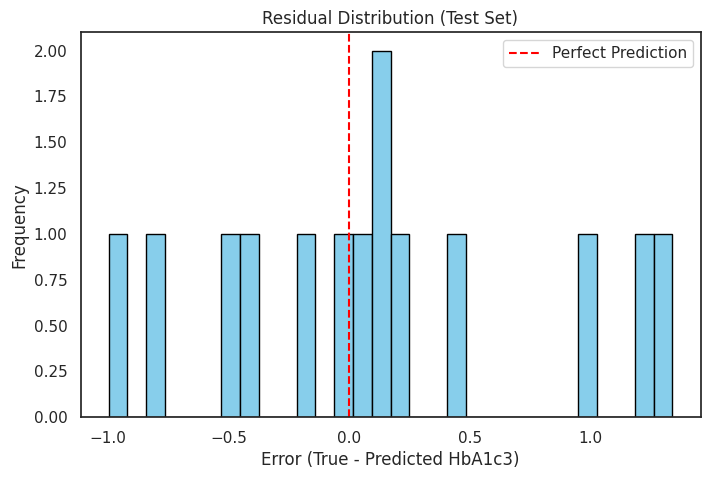

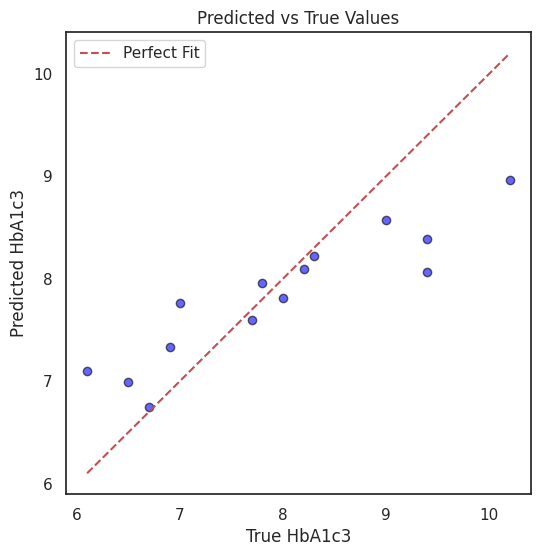

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals (true - predicted) for test set
errors = y_test - y_test_pred

# --- Histogram of residuals ---
plt.figure(figsize=(8,5))
plt.hist(errors, bins=30, color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='Perfect Prediction')
plt.title("Residual Distribution (Test Set)")
plt.xlabel("Error (True - Predicted stroke)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# --- Scatter plot: Predicted vs True ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', label='Perfect Fit')
plt.xlabel("True stroke")
plt.ylabel("Predicted stroke")
plt.title("Predicted vs True Values")
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import LeaveOneOut, cross_val_score
import numpy as np

# Your data
trained_features = [
    'HbA1c1','HbA1c2','Avg_FVG_1_2','FVG1','FVG2','FVG_Delta_1_2','Reduction A'
]
X = df[trained_features]
y = df['stroke']

# Model
model = RidgeCV(alphas=np.logspace(-3,3,25))

# LOOCV
loo = LeaveOneOut()
scores = cross_val_score(model, X, y, cv=loo, scoring='neg_mean_absolute_error')

# Results
print("LOOCV MAE:", abs(np.mean(scores)))
print("Standard Deviation:", abs(np.std(scores)))


LOOCV MAE: 0.6176105836027425
Standard Deviation: 0.5819574234602619
